In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
plt.rcParams["figure.figsize"] = (15,5)

# Process datafiles to csv

In [3]:
file_name = "AE33_AE33-S07-00604_20220530"
with open(f"BC_edited_datafiles/{file_name}.csv", "w") as g:
    with open(f"BC_datafiles/{file_name}.dat", "r") as f:
        [f.readline() for i in range(5)]
        # Read headings
        g.write(f.readline().replace(';',',').replace(' ', '')[:-2] + '\n')
        [f.readline() for i in range(2)]
        # Read data
        l = f.read().replace(' ', ',')
        l = l.split('\n')
        l = [i[:-6] for i in l]
        for i in l:
            g.write(i+'\n')


# Main Code

In [4]:
df = pd.read_csv(f"BC_edited_datafiles/{file_name}.csv")
df["BC6"].describe()

count    1438.000000
mean       20.170376
std        29.877729
min      -107.000000
25%         1.000000
50%        20.500000
75%        38.000000
max       135.000000
Name: BC6, dtype: float64

In [5]:
df.drop(df[df["BC6"] < 0].index, inplace=True)
df["DateTime"] = pd.to_datetime(df["Date(yyyy/MM/dd)"]+' '+df["Time(hh:mm:ss)"])
df.drop("Date(yyyy/MM/dd)", axis=1, inplace=True)
df.drop("Time(hh:mm:ss)", axis=1, inplace=True)

In [6]:
df["BC6"].describe()

count    1112.000000
mean       31.598921
std        21.841898
min         0.000000
25%        15.000000
50%        29.000000
75%        44.000000
max       135.000000
Name: BC6, dtype: float64

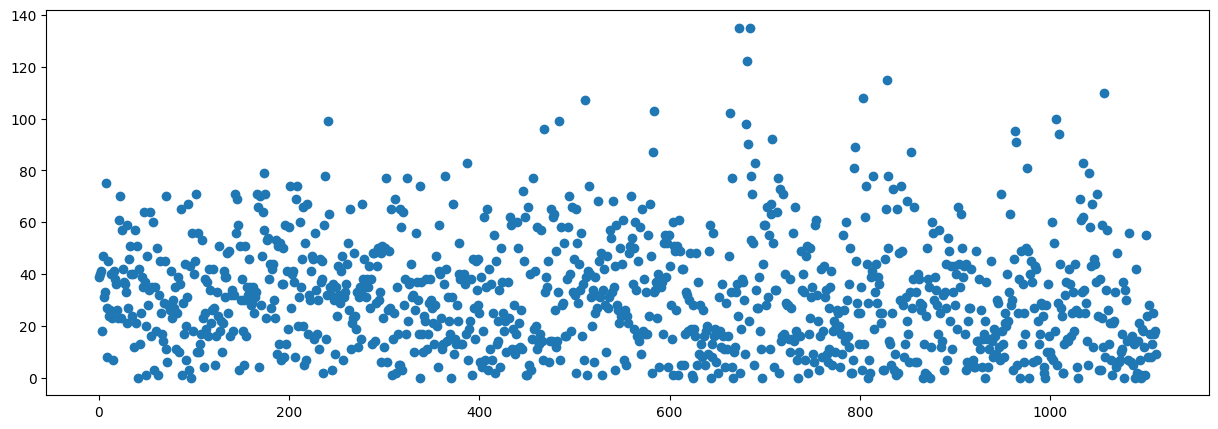

In [7]:
import matplotlib.pyplot as plt
plt.scatter(range(len(df)), df["BC6"])

# Finding daily mean (one file is one day) of B6

In [8]:
mean_bc6 = df["BC6"].mean()
std_bc6 = df["BC6"].std()
print(f"{mean_bc6=}")
print(f"{std_bc6=}")

mean_bc6=31.598920863309353
std_bc6=21.84189812461135


# Filtering dataset using outliers

In [9]:
filtered_dataset_2_sigma = df[(abs(df["BC6"] - mean_bc6) <= 2*std_bc6)]
filtered_dataset_3_sigma = df[(abs(df["BC6"] - mean_bc6) <= 3*std_bc6)]

In [10]:
filtered_dataset_2_sigma["BC6"].describe()

count    1073.000000
mean       29.394222
std        18.626941
min         0.000000
25%        14.000000
50%        28.000000
75%        42.000000
max        75.000000
Name: BC6, dtype: float64

In [11]:
filtered_dataset_3_sigma["BC6"].describe()

count    1099.000000
mean       30.668790
std        20.169217
min         0.000000
25%        14.000000
50%        29.000000
75%        43.000000
max        96.000000
Name: BC6, dtype: float64

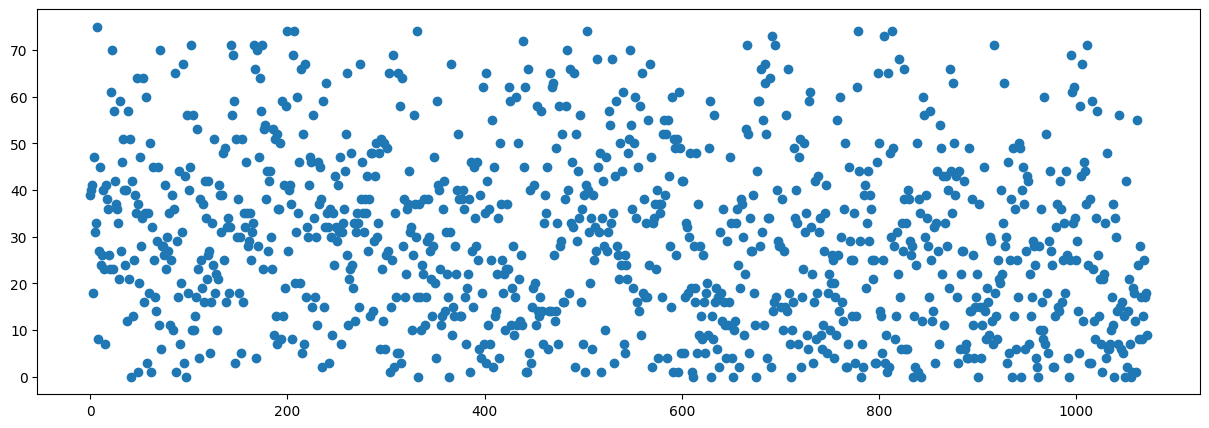

In [12]:
import matplotlib.pyplot as plt
plt.scatter(range(len(filtered_dataset_2_sigma)), filtered_dataset_2_sigma["BC6"])

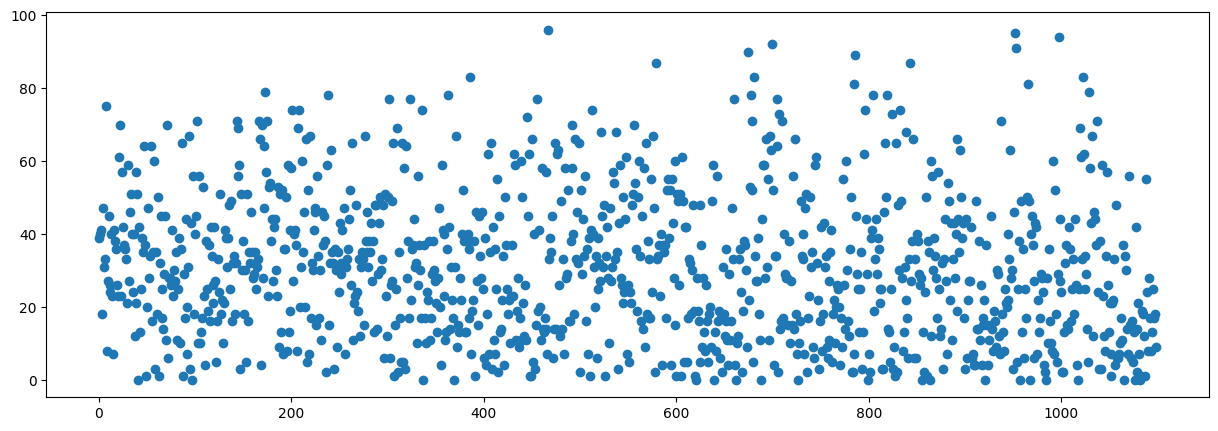

In [13]:
import matplotlib.pyplot as plt
plt.scatter(range(len(filtered_dataset_3_sigma)), filtered_dataset_3_sigma["BC6"])

# Using filtered data and then doing analysis on hourly interval

## 2 Sigma

In [14]:
time_interval_mins = 120
time_interval_sliced_2_sigma = filtered_dataset_2_sigma.copy()
time_interval_sliced_2_sigma["Timeread"] = pd.to_datetime(filtered_dataset_2_sigma['DateTime']).dt.floor(f"{time_interval_mins}Min")

In [15]:
time_interval_sliced_2_sigma.describe()

,Timebase,RefCh1,Sen1Ch1,Sen2Ch1,RefCh2,Sen1Ch2,Sen2Ch2,RefCh3,Sen1Ch3,Sen2Ch3,...,K1,K2,K3,K4,K5,K6,K7,TapeAdvCount,DateTime,Timeread
count,1073.0,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,...,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.0,1073,1073
mean,60.0,922051.885368,530853.563840,713610.976701,920867.302889,611820.518173,771876.374651,911929.023299,619270.921715,772423.056850,...,0.007908,0.008134,0.008380,0.008715,0.008629,0.007422,0.007317,84.0,2022-05-30 11:00:26.169617920,2022-05-30 10:01:20.521901312
min,60.0,919005.000000,523799.000000,709428.000000,919196.000000,604971.000000,768296.000000,910560.000000,612964.000000,769197.000000,...,0.007880,0.008120,0.008373,0.008680,0.008583,0.007351,0.007254,84.0,2022-05-30 00:00:00,2022-05-30 00:00:00
25%,60.0,920173.000000,526706.000000,710612.000000,919832.000000,607858.000000,769575.000000,911058.000000,615615.000000,770409.000000,...,0.007902,0.008132,0.008376,0.008694,0.008603,0.007388,0.007280,84.0,2022-05-30 04:52:00,2022-05-30 04:00:00
50%,60.0,922259.000000,529214.000000,711384.000000,920955.000000,610686.000000,770619.000000,911890.000000,618258.000000,771390.000000,...,0.007914,0.008134,0.008379,0.008718,0.008625,0.007421,0.007302,84.0,2022-05-30 10:18:00,2022-05-30 10:00:00
75%,60.0,923544.000000,535118.000000,716732.000000,921697.000000,615860.000000,774273.000000,912687.000000,623000.000000,774544.000000,...,0.007917,0.008137,0.008383,0.008737,0.008661,0.007459,0.007362,84.0,2022-05-30 17:25:00,2022-05-30 16:00:00
max,60.0,925431.000000,541296.000000,721160.000000,922790.000000,621409.000000,777588.000000,913655.000000,628049.000000,777456.000000,...,0.007920,0.008142,0.008390,0.008742,0.008666,0.007494,0.007377,84.0,2022-05-30 23:59:00,2022-05-30 22:00:00
std,0.0,1922.834383,5167.350008,3626.880835,1056.704121,4867.665307,2793.318272,911.226229,4478.308246,2471.253892,...,0.000012,0.000005,0.000004,0.000020,0.000027,0.000040,0.000039,0.0,NaN,NaN


In [16]:
daily_filtered_dataset_2_sigma = pd.DataFrame(columns=df.columns)
for prev, next in zip(time_interval_sliced_2_sigma["Timeread"].unique(), time_interval_sliced_2_sigma["Timeread"].unique()[1:]):
    hourly_df = time_interval_sliced_2_sigma[(time_interval_sliced_2_sigma["DateTime"]>=prev) & (time_interval_sliced_2_sigma["DateTime"]<next)]

    new_mean = hourly_df["BC6"].mean()
    new_std = hourly_df["BC6"].std()

    hourly_filtered_2_sigma = hourly_df[(abs(hourly_df["BC6"] - new_mean) <= 2*new_std)]

    daily_filtered_dataset_2_sigma = pd.concat([daily_filtered_dataset_2_sigma, hourly_filtered_2_sigma])

In [17]:
daily_filtered_dataset_2_sigma.describe()

,Temperature(°C),BB(%),K1,K2,K3,K4,K5,K6,K7,DateTime,Timeread
count,9.680000e+02,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968,968
mean,2.111000e+01,25.252479,0.007908,0.008134,0.008380,0.008715,0.008630,0.007425,0.007320,2022-05-30 10:02:55.661157120,2022-05-30 09:04:05.454545664
min,2.111000e+01,0.000000,0.007880,0.008120,0.008373,0.008680,0.008583,0.007351,0.007254,2022-05-30 00:00:00,2022-05-30 00:00:00
25%,2.111000e+01,0.000000,0.007900,0.008132,0.008376,0.008693,0.008601,0.007389,0.007282,2022-05-30 04:31:45,2022-05-30 04:00:00
50%,2.111000e+01,0.000000,0.007913,0.008134,0.008380,0.008719,0.008627,0.007424,0.007314,2022-05-30 09:27:30,2022-05-30 08:00:00
75%,2.111000e+01,43.550000,0.007917,0.008137,0.008384,0.008737,0.008662,0.007462,0.007362,2022-05-30 15:31:30,2022-05-30 14:00:00
max,2.111000e+01,100.000000,0.007920,0.008142,0.008390,0.008742,0.008666,0.007494,0.007377,2022-05-30 21:58:00,2022-05-30 20:00:00
std,7.109100e-15,38.932239,0.000012,0.000005,0.000005,0.000021,0.000027,0.000041,0.000040,NaN,NaN


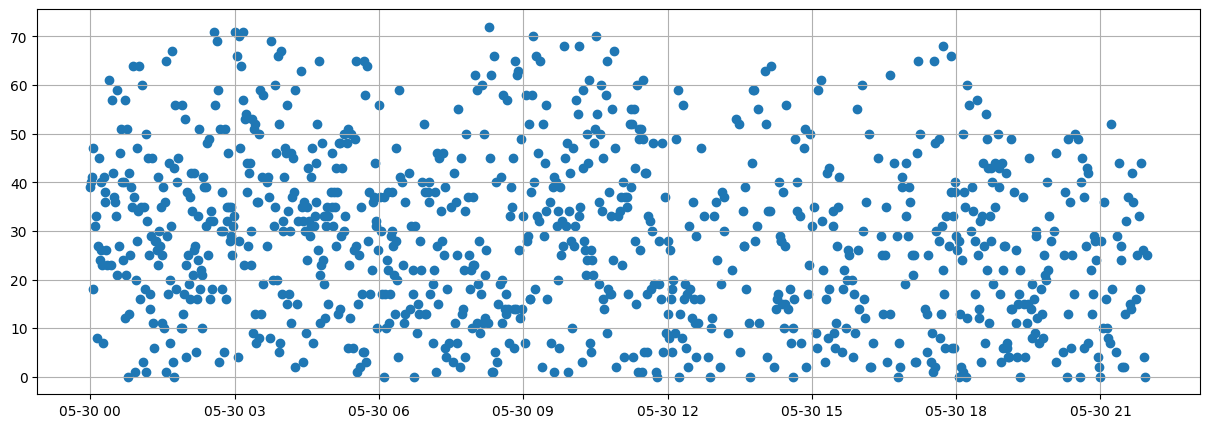

In [18]:
plt.scatter(daily_filtered_dataset_2_sigma["DateTime"], daily_filtered_dataset_2_sigma["BC6"])
plt.grid()

## 3 Sigma

In [19]:
time_interval_mins = 60
time_interval_sliced_3_sigma = filtered_dataset_3_sigma.copy()
time_interval_sliced_3_sigma["Timeread"] = pd.to_datetime(filtered_dataset_3_sigma['DateTime']).dt.floor(f"{time_interval_mins}Min")

time_interval_sliced_3_sigma.describe()

daily_filtered_dataset_3_sigma = pd.DataFrame(columns=df.columns)
for prev, next in zip(time_interval_sliced_3_sigma["Timeread"].unique(), time_interval_sliced_3_sigma["Timeread"].unique()[1:]):
    hourly_df = time_interval_sliced_3_sigma[(time_interval_sliced_3_sigma["DateTime"]>=prev) & (time_interval_sliced_3_sigma["DateTime"]<next)]

    new_mean = hourly_df["BC6"].mean()
    new_std = hourly_df["BC6"].std()

    hourly_filtered_3_sigma = hourly_df[(abs(hourly_df["BC6"] - new_mean) <= 3*new_std)]

    daily_filtered_dataset_3_sigma = pd.concat([daily_filtered_dataset_3_sigma, hourly_filtered_3_sigma])

In [20]:
daily_filtered_dataset_3_sigma.describe()

,Temperature(°C),BB(%),K1,K2,K3,K4,K5,K6,K7,DateTime,Timeread
count,1.059000e+03,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059,1059
mean,2.111000e+01,24.594429,0.007908,0.008134,0.008380,0.008715,0.008629,0.007423,0.007318,2022-05-30 10:37:49.065155840,2022-05-30 10:08:23.116147456
min,2.111000e+01,0.000000,0.007880,0.008120,0.008373,0.008680,0.008583,0.007351,0.007254,2022-05-30 00:00:00,2022-05-30 00:00:00
25%,2.111000e+01,0.000000,0.007901,0.008132,0.008376,0.008693,0.008602,0.007387,0.007281,2022-05-30 04:46:30,2022-05-30 04:00:00
50%,2.111000e+01,0.000000,0.007914,0.008134,0.008379,0.008719,0.008625,0.007422,0.007304,2022-05-30 10:01:00,2022-05-30 10:00:00
75%,2.111000e+01,40.100000,0.007917,0.008137,0.008384,0.008737,0.008662,0.007460,0.007362,2022-05-30 16:39:30,2022-05-30 16:00:00
max,2.111000e+01,100.000000,0.007920,0.008142,0.008390,0.008742,0.008666,0.007494,0.007377,2022-05-30 22:58:00,2022-05-30 22:00:00
std,7.108785e-15,38.509000,0.000012,0.000005,0.000005,0.000021,0.000027,0.000041,0.000040,NaN,NaN


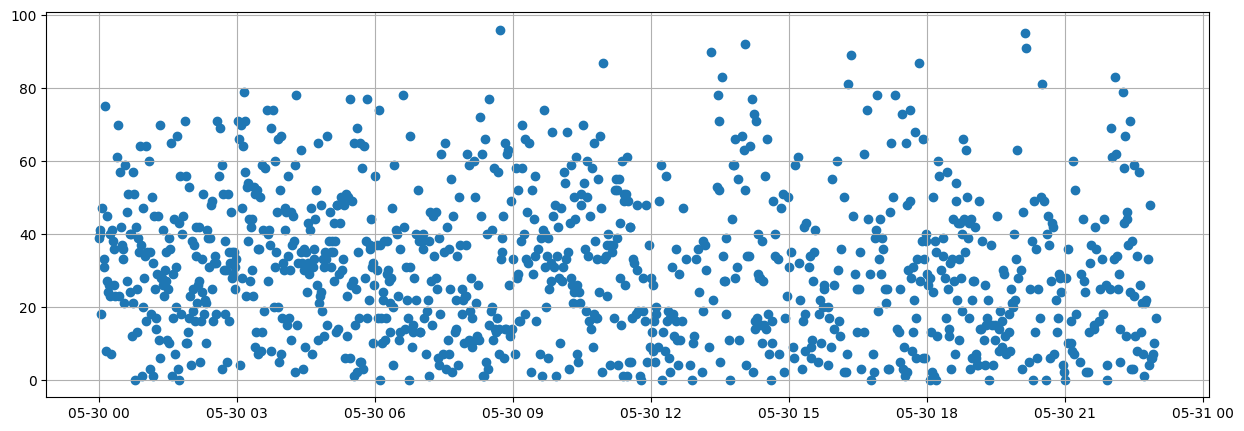

In [21]:
plt.scatter(daily_filtered_dataset_3_sigma["DateTime"], daily_filtered_dataset_3_sigma["BC6"])
plt.grid()

# Black carbon concentration for multiple days (Conclusion)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Clearing data file
with open("BC_edited_datafiles/consolidated_data.csv", "w") as f:
    f.write("Timebase,RefCh1,Sen1Ch1,Sen2Ch1,RefCh2,Sen1Ch2,Sen2Ch2,RefCh3,Sen1Ch3,Sen2Ch3,RefCh4,Sen1Ch4,Sen2Ch4,RefCh5,Sen1Ch5,Sen2Ch5,RefCh6,Sen1Ch6,Sen2Ch6,RefCh7,Sen1Ch7,Sen2Ch7,Flow1,Flow2,FlowC,Pressure(Pa),Temperature(°C),BB(%),ContTemp,SupplyTemp,Status,ContStatus,DetectStatus,LedStatus,ValveStatus,LedTemp,BC11,BC12,BC1,BC21,BC22,BC2,BC31,BC32,BC3,BC41,BC42,BC4,BC51,BC52,BC5,BC61,BC62,BC6,BC71,BC72,BC7,K1,K2,K3,K4,K5,K6,K7,TapeAdvCount,DateTime,Timeread\n")

# yyyy-mm-dd
for date in pd.date_range(start="2022-05-30",end="2022-06-05"):
    file_name = f"AE33_AE33-S07-00604_{date.year}{str(date.month).rjust(2, '0')}{str(date.day).rjust(2, '0')}"
    
    # Converting to csv
    with open(f"BC_edited_datafiles/{file_name}.csv", "w") as g:
        with open(f"BC_datafiles/{file_name}.dat", "r") as f:
            [f.readline() for i in range(5)]
            # Read headings
            g.write(f.readline().replace(';',',').replace(' ', '')[:-2] + '\n')
            [f.readline() for i in range(2)]
            # Read data
            l = f.read().replace(' ', ',')
            l = l.split('\n')
            l = [i[:-6] for i in l]
            for i in l:
                g.write(i+'\n')
    
    df = pd.read_csv(f"BC_edited_datafiles/{file_name}.csv")

    # Dropping all negative BC6
    df.drop(df[df["BC6"] < 0].index, inplace=True)
    df["DateTime"] = pd.to_datetime(df["Date(yyyy/MM/dd)"]+' '+df["Time(hh:mm:ss)"])
    df.drop("Date(yyyy/MM/dd)", axis=1, inplace=True)
    df.drop("Time(hh:mm:ss)", axis=1, inplace=True)

    # Daily data filteration
    daily_mean_bc6 = df["BC6"].mean()
    daily_std_bc6 = df["BC6"].std()

    num_of_sigma = 2

    filtered_dataset = df[(abs(df["BC6"] - daily_mean_bc6) <= num_of_sigma*daily_std_bc6)]
    
    # Hourly filteration
    time_interval_mins = 60
    time_interval_sliced = filtered_dataset.copy()
    time_interval_sliced["Timeread"] = pd.to_datetime(filtered_dataset['DateTime']).dt.floor(f"{time_interval_mins}Min")

    # Stitching back daily data
    daily_filtered_dataset = pd.DataFrame(columns=df.columns)
    for prev, next in zip(time_interval_sliced["Timeread"].unique(), time_interval_sliced["Timeread"].unique()[1:]):
        hourly_df = time_interval_sliced[(time_interval_sliced["DateTime"]>=prev) & (time_interval_sliced["DateTime"]<next)]

        new_mean = hourly_df["BC6"].mean()
        new_std = hourly_df["BC6"].std()

        hourly_filtered = hourly_df[(abs(hourly_df["BC6"] - new_mean) <= num_of_sigma*new_std)]

        daily_filtered_dataset = pd.concat([daily_filtered_dataset, hourly_filtered])
    daily_filtered_dataset.to_csv("BC_edited_datafiles/consolidated_data.csv", index=False, mode='a', header=False)

In [23]:
# Reading the cleaned dataset
df = pd.read_csv("BC_edited_datafiles/consolidated_data.csv")
df["DateTime"] = pd.to_datetime(df["DateTime"])

In [24]:
df["BC6"].describe()

count    6118.000000
mean       17.952762
std        13.212387
min         0.000000
25%         8.000000
50%        16.000000
75%        26.000000
max        74.000000
Name: BC6, dtype: float64

# Automatic graph generation

/tmp/ipykernel_3594/98562241.py:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.figure.colorbar(sm)


ValueError: No figure Axes(0.125,0.2;0.62x0.68)

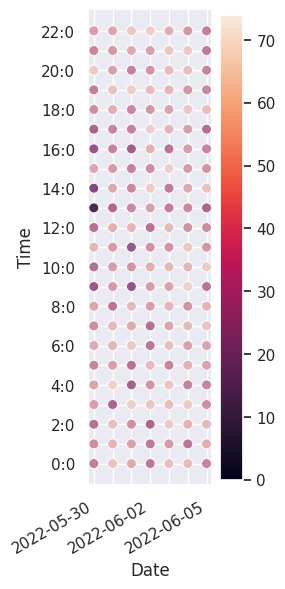

In [70]:
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

time_step = 60
df["Time"] = [f"{i.time().hour}:{(i.time().minute//time_step) * time_step}" for i in df["DateTime"]]
df["Date"] = [str(i.date()) for i in df["DateTime"]]
sns.set_theme()
plt.rcParams["figure.figsize"] = (2,7 * 60/time_step)
plt.gcf().autofmt_xdate()

fig = sns.scatterplot(data=df, x='Date', y='Time', hue='BC6', s=50)
fig.invert_yaxis()
for ind, label in enumerate(fig.get_yticklabels()):
    if ind % 2 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
for ind, label in enumerate(fig.get_xticklabels()):
    if ind % 3 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.gcf().autofmt_xdate()
# plt.legend(loc="upper right", bbox_to_anchor=(1.7, 1))

fig.get_legend().remove()
norm = plt.Normalize(df['BC6'].min(), df['BC6'].max())
sm = plt.cm.ScalarMappable(norm=norm)
sm.set_array([])
fig.figure.colorbar(sm)

with PdfPages('multipage_pdf.pdf') as pdf:
    pdf.savefig(fig)

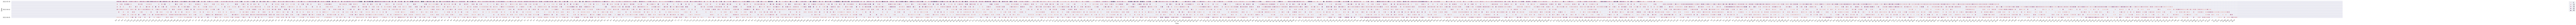

<Figure size 36000x300 with 0 Axes>

In [43]:
import seaborn as sns
time_step = 1
df["Time"] = [f"{i.time().hour}:{(i.time().minute//time_step) * time_step}" for i in df["DateTime"]]
df["Date"] = [str(i.date()) for i in df["DateTime"]]
sns.set_theme()
plt.rcParams["figure.figsize"] = (6 * 60/time_step,3)
plt.gcf().autofmt_xdate()

fig = sns.scatterplot(data=df, x='Time', y='Date', hue='BC6', s=100)
for ind, label in enumerate(fig.get_yticklabels()):
    if ind % 3 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
for ind, label in enumerate(fig.get_xticklabels()):
    if ind % 2 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.gcf().autofmt_xdate()
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 1))
plt.show()